In [117]:
using Plots
using LinearAlgebra
using LaTeXStrings
using StatsBase

In [118]:
t_start = time();

## Parameters:

In [119]:
L = 6;

Lx = L;
Ly = L;

Equation of two lines are $y = mx + c_1$ and $y = mx + c_2$

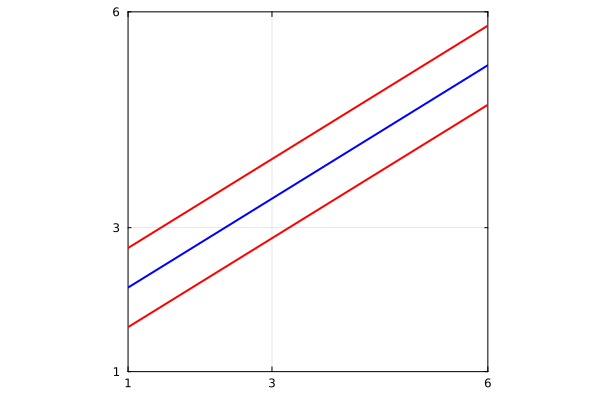

In [120]:
m = (-1+sqrt(5))/2
c1 = 1
c2 = 2.1

function line_down(x::Float64)
    return c1 + m*x
end

function line_up(x::Float64)
    return c2 + m*x
end

function line_middle(x::Float64)
    return (line_up(x) + line_down(x))/2
end

line_x = [1.0,L]
line_down_y = line_down.(line_x)
line_up_y = line_up.(line_x)

plot(line_x,line_down_y,color="red",width=2, xlims=(1,Lx),ylims=(1,Ly),legend=:none,aspect_ratio=:equal,frame=:box, framestyle=:thick,xticks=[1,Lx/2,Lx],yticks=[1,Ly/2,Ly])
plot!(line_x,line_up_y,color="red",width=2)
plot!(line_x,line_middle.(line_x),color="blue",width=2)

In [121]:
points_x_array = range(1, L,L)
points_y_array = range(1, L,L)

points2 = zeros(2*L^2)
for ii = 1:L
    for jj = 1:L
        points2[2*((jj-1)*L+ii)-1] = points_x_array[ii]
        points2[2*((jj-1)*L+ii)] = points_y_array[jj]
    end
end


### These arrays have N^2 elements, and hold the x and y coordinates of nth site
points_x_array = points2[1:2:end]
points_y_array =  points2[2:2:end]

site_index = range(1,L^2, L^2)

1.0:1.0:36.0

### Now we isolate the PTB points

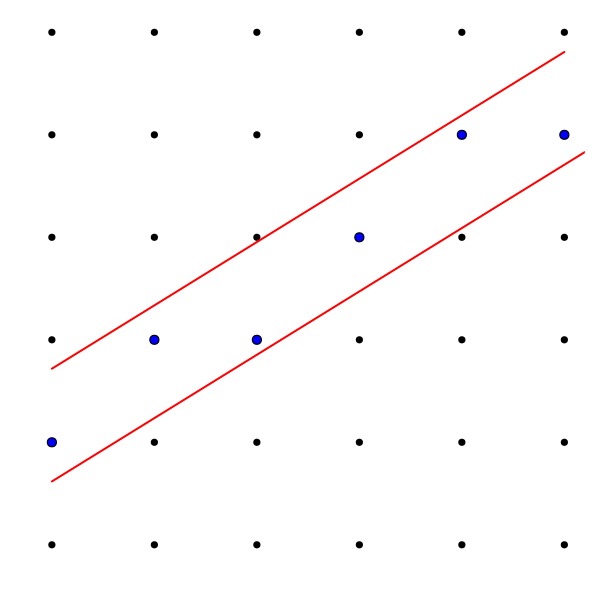

In [122]:
### PTB_index will contain ordered indices of the sites in PTB

PTB_index_dummy = collect(range(1,L^2,L^2))
for ii = 1:L^2
    if (points_y_array[ii] >= line_down(points_x_array[ii])) && (points_y_array[ii] <= line_up(points_x_array[ii]))
        ## Do nothing
    else
        PTB_index_dummy[ii] = 0.0
    end
end

## Here we store non-zero indices
PTB_index = findall(!iszero, PTB_index_dummy)

N_PTB = size(PTB_index)[1]

points_PTB_array_x = zeros(N_PTB)
points_PTB_array_y = zeros(N_PTB)

for ii = 1:N_PTB
    points_PTB_array_x[ii] = points_x_array[PTB_index[ii]]
    points_PTB_array_y[ii] = points_y_array[PTB_index[ii]]
end

### Draw lines separating PTB
line_x = [1.0,L]
line_down_y = line_down.([1.0,L+0.5])
line_up_y = line_up.(line_x)

plt_lattice=scatter(points_x_array, points_y_array,aspect_ratio=1,legend=false, 
                    xlims=[0.8,L+0.2], ylims=[0.8,L+0.2],color="black",markersize=4,
                    grid=:none,
                    frame=:none, size=(600,600))
plt_lattice=plot!(line_x,line_up_y,color="red",width=2)
plt_lattice=plot!([1,L+0.5],line_down_y,color="red",width=2)
# plt_lattice=plot!(line_x,line_middle.(line_x),color="blue",width=2)
plt_lattice=scatter!(points_PTB_array_x, points_PTB_array_y,color="blue",aspect_ratio=1,legend=false,markersize=5)

## Percentage of sites in PTB

In [123]:
println("Number of sites in PTB = ",N_PTB)
println("Amount of sites in PTB = ",100* N_PTB/L^2, " %")

Number of sites in PTB = 6
Amount of sites in PTB = 16.666666666666668 %


In [124]:
println(PTB_index)

[7, 14, 15, 22, 29, 30]


## Coordinates of projected sites

### Equation of line_down is $y=mx + c_1$
### Equation of projector line is, $y-y_1 = (-1/m).(x-x_1)$, where $(x_1,y_1)$ is the coordinate of the site
### The two lines intersect at $((m.y_1 + x_1 - m.c_1)/(m^2 + 1), (m^2.y_1 + m.x_1 + c_1)/(m^2 + 1))$

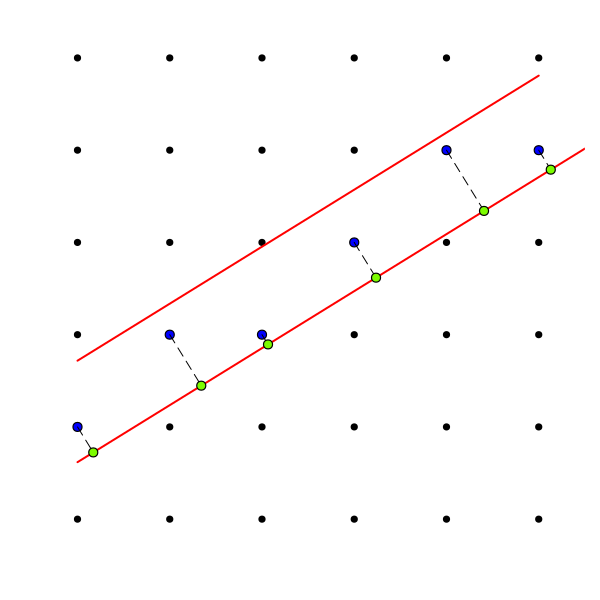

In [125]:
projected_points_PTB_array_x = (m*points_PTB_array_y + points_PTB_array_x - m*ones(N_PTB)*c1)/(m^2 + 1);
projected_points_PTB_array_y = m*projected_points_PTB_array_x + c1 * ones(N_PTB);

## This array contains distance along the line
## This should be x coordinates on the line * sec(theta), where the slope is tan(theta) = m
distance_along_projected_line = projected_points_PTB_array_x * sqrt(m^2 +1)

for ii = 1:N_PTB
    line_projected_x = [points_PTB_array_x[ii],projected_points_PTB_array_x[ii]]
    line_projected_y = [points_PTB_array_y[ii],projected_points_PTB_array_y[ii]]
    plt_lattice=plot!(line_projected_x,line_projected_y,linestyle=:dash, color="black")
end
plt_lattice=scatter!(projected_points_PTB_array_x,projected_points_PTB_array_y, 
            xlims=(0.5,maximum(vcat(projected_points_PTB_array_x,Lx+0.5))), ylims=(0.5,maximum(vcat(projected_points_PTB_array_y,Ly+0.5))), markersize=5, color="lawngreen")
display(plt_lattice)